In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations':
  os.chdir(r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/zipimport.py": 1708118050.3201988, "/home/hasan/miniconda3/lib/python3.12/codecs.py": 1708118050.0762022, "/home/hasan/miniconda3/lib/python3.12/encodings/aliases.py": 1708118050.5121963, "/home/hasan/miniconda3/lib/python3.12/encodings/__init__.py": 1708118050.6041949, "/home/hasan/miniconda3/lib/python3.12/encodings/utf_8.py": 1708118050.7081935, "/home/hasan/miniconda3/lib/python3.12/abc.py": 1708118050.0562024, "/home/hasan/miniconda3/lib/python3.12/io.py": 1708118050.1442013, "/home/hasan/miniconda3/lib/python3.12/stat.py": 1708118050.2561998, "/home/hasan/miniconda3/lib/python3.12/_collections_abc.py": 1708118050.084202, "/home/hasan/miniconda3/lib/python3.12/genericpath.py": 1708118050.1242015, "/home/hasan/miniconda3/lib/python3.12/posixpath.py": 1708118050.19220

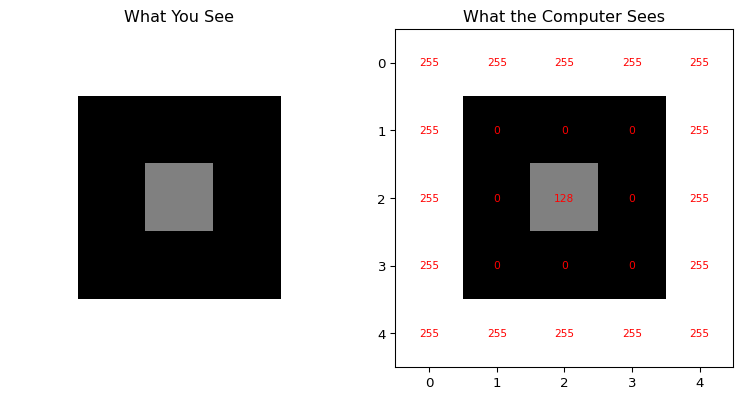

The computer sees this as a 5x5 grid of numbers:
[[255 255 255 255 255]
 [255   0   0   0 255]
 [255   0 128   0 255]
 [255   0   0   0 255]
 [255 255 255 255 255]]


In [2]:
#| eval: true
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 5x5 "image" (just numbers!)
simple_image = np.array([
    [255, 255, 255, 255, 255],
    [255,   0,   0,   0, 255],
    [255,   0, 128,   0, 255],
    [255,   0,   0,   0, 255],
    [255, 255, 255, 255, 255]
])

# Show it as an image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(simple_image, cmap='gray')
plt.title("What You See")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(simple_image, cmap='gray')
plt.title("What the Computer Sees")
for i in range(5):
    for j in range(5):
        plt.text(j, i, str(simple_image[i, j]), 
                ha='center', va='center', color='red', fontsize=8)

plt.tight_layout()
plt.show()

print("The computer sees this as a 5x5 grid of numbers:")
print(simple_image)